In [1]:
import sys
import os

sys.path.append(os.path.join('..', '..', '..'))

In [2]:
from roboflow import Roboflow
from config import ROBOFLOW_API_KEY

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("mihailo").project("football-players-detection-3zvbc-7ocfe")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [6]:
import os
import yaml

YAML_PATH = os.path.join(dataset.location,"data.yaml")

with open(YAML_PATH) as f:
     list_doc = yaml.safe_load(f)

list_doc['test'] = '../test/images'
list_doc['train'] = '../train/images'
list_doc['val'] = '../valid/images'

print(list_doc)

with open(YAML_PATH, "w") as f:
    yaml.dump(list_doc, f)

{'names': ['ball', 'goalkeeper', 'player', 'referee'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'football-players-detection-3zvbc-7ocfe', 'url': 'https://universe.roboflow.com/mihailo/football-players-detection-3zvbc-7ocfe/dataset/2', 'version': 2, 'workspace': 'mihailo'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [ ]:
!yolo mode=train model=yolo11s.pt task=detect data={YAML_PATH} epochs=200 patience=20 imgsz=1280 batch=8 plots=True cache=False

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/gdrive/MyDrive/yolo_football_train_v5/football-players-detection-2/data.yaml, epochs=200, time=None, patience=20, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

In [1]:
RESULTS_DIR = 'runs/detect/train8'

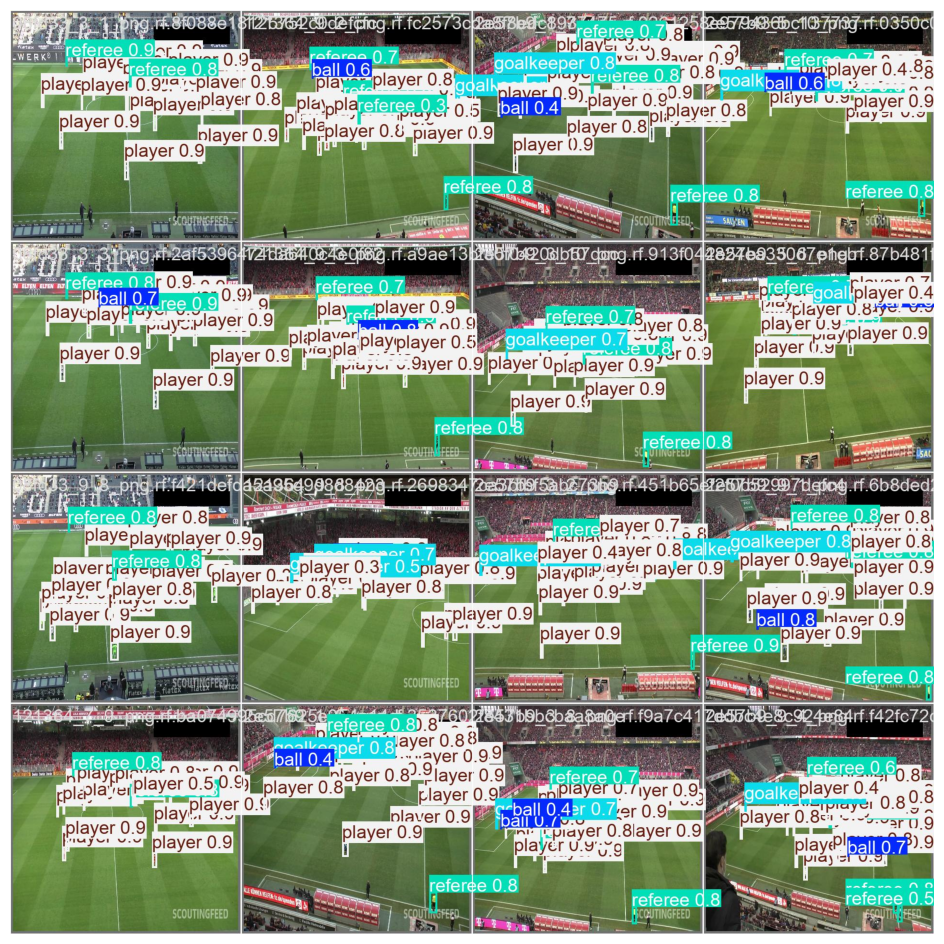

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
plt.axis(False)
plt.imshow(mpimg.imread(f'{RESULTS_DIR}/val_batch0_pred.jpg'))

plt.show()


In [9]:
!yolo task=detect mode=val model={RESULTS_DIR}/weights/best.pt data={YAML_PATH}

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
100% 755k/755k [00:00<00:00, 22.4MB/s]
val: Scanning /gdrive/MyDrive/yolo_football_train_v5/football-players-detection-2/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:28<00:00,  7.11s/it]
                   all         49       1174      0.888      0.876      0.903      0.658
                  ball         45         45      0.781        0.6      0.667      0.329
            goalkeeper         38         39       0.88      0.941      0.965      0.773
                player         49        973      0.961      0.988      0.994      0.834
               referee         49        117      0.928      0.974      0.984      0.696
Speed: 21.8ms preprocess, 42.3ms inference, 0.0ms loss, 24

In [2]:
import os
import shutil

source_path = f'{RESULTS_DIR}/weights/best.pt'
destination_dir = '../../weights'
destination_file = os.path.join(destination_dir, 'object-detection.pt')

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move and rename the file
try:
    shutil.move(source_path, destination_file)
    print(f"File moved and renamed to {destination_file}")
except FileNotFoundError:
    print(f"Source file '{source_path}' not found.")
except Exception as e:
    print(f"Error occurred: {e}")

File moved and renamed to ../../weights\object-detection.pt
